## Import Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

## Read Data

In [3]:
df = pd.read_csv("../Dataset/AirQuality.csv", delimiter=";")
df.shape

(9471, 17)

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

## Membersihkan Data

In [6]:
df = df.dropna(axis=0, how='all')  # untuk menghapus baris jika semua adalanya nan
df = df.dropna(axis=1, how='all')   # untuk menghapus kolom jika semua isinya adalah nan
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
df.shape

(9357, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [10]:
df['T'] = pd.to_numeric(df['T'].str.replace(',', '.'))
df['AH'] = pd.to_numeric(df['AH'].str.replace(',', '.'))
df['RH'] = pd.to_numeric(df['RH'].str.replace(',', '.'))
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].str.replace(',', '.'))
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'].str.replace(',', '.'))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [12]:
df['Date'].unique()

array(['10/03/2004', '11/03/2004', '12/03/2004', '13/03/2004',
       '14/03/2004', '15/03/2004', '16/03/2004', '17/03/2004',
       '18/03/2004', '19/03/2004', '20/03/2004', '21/03/2004',
       '22/03/2004', '23/03/2004', '24/03/2004', '25/03/2004',
       '26/03/2004', '27/03/2004', '28/03/2004', '29/03/2004',
       '30/03/2004', '31/03/2004', '01/04/2004', '02/04/2004',
       '03/04/2004', '04/04/2004', '05/04/2004', '06/04/2004',
       '07/04/2004', '08/04/2004', '09/04/2004', '10/04/2004',
       '11/04/2004', '12/04/2004', '13/04/2004', '14/04/2004',
       '15/04/2004', '16/04/2004', '17/04/2004', '18/04/2004',
       '19/04/2004', '20/04/2004', '21/04/2004', '22/04/2004',
       '23/04/2004', '24/04/2004', '25/04/2004', '26/04/2004',
       '27/04/2004', '28/04/2004', '29/04/2004', '30/04/2004',
       '01/05/2004', '02/05/2004', '03/05/2004', '04/05/2004',
       '05/05/2004', '06/05/2004', '07/05/2004', '08/05/2004',
       '09/05/2004', '10/05/2004', '11/05/2004', '12/05

In [13]:
len(df['Date'].unique())

391

In [14]:
df['Time'].unique()

array(['18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00',
       '23.00.00', '00.00.00', '01.00.00', '02.00.00', '03.00.00',
       '04.00.00', '05.00.00', '06.00.00', '07.00.00', '08.00.00',
       '09.00.00', '10.00.00', '11.00.00', '12.00.00', '13.00.00',
       '14.00.00', '15.00.00', '16.00.00', '17.00.00'], dtype=object)

In [15]:
len(df['Time'].unique())

24

In [16]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [18]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [19]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


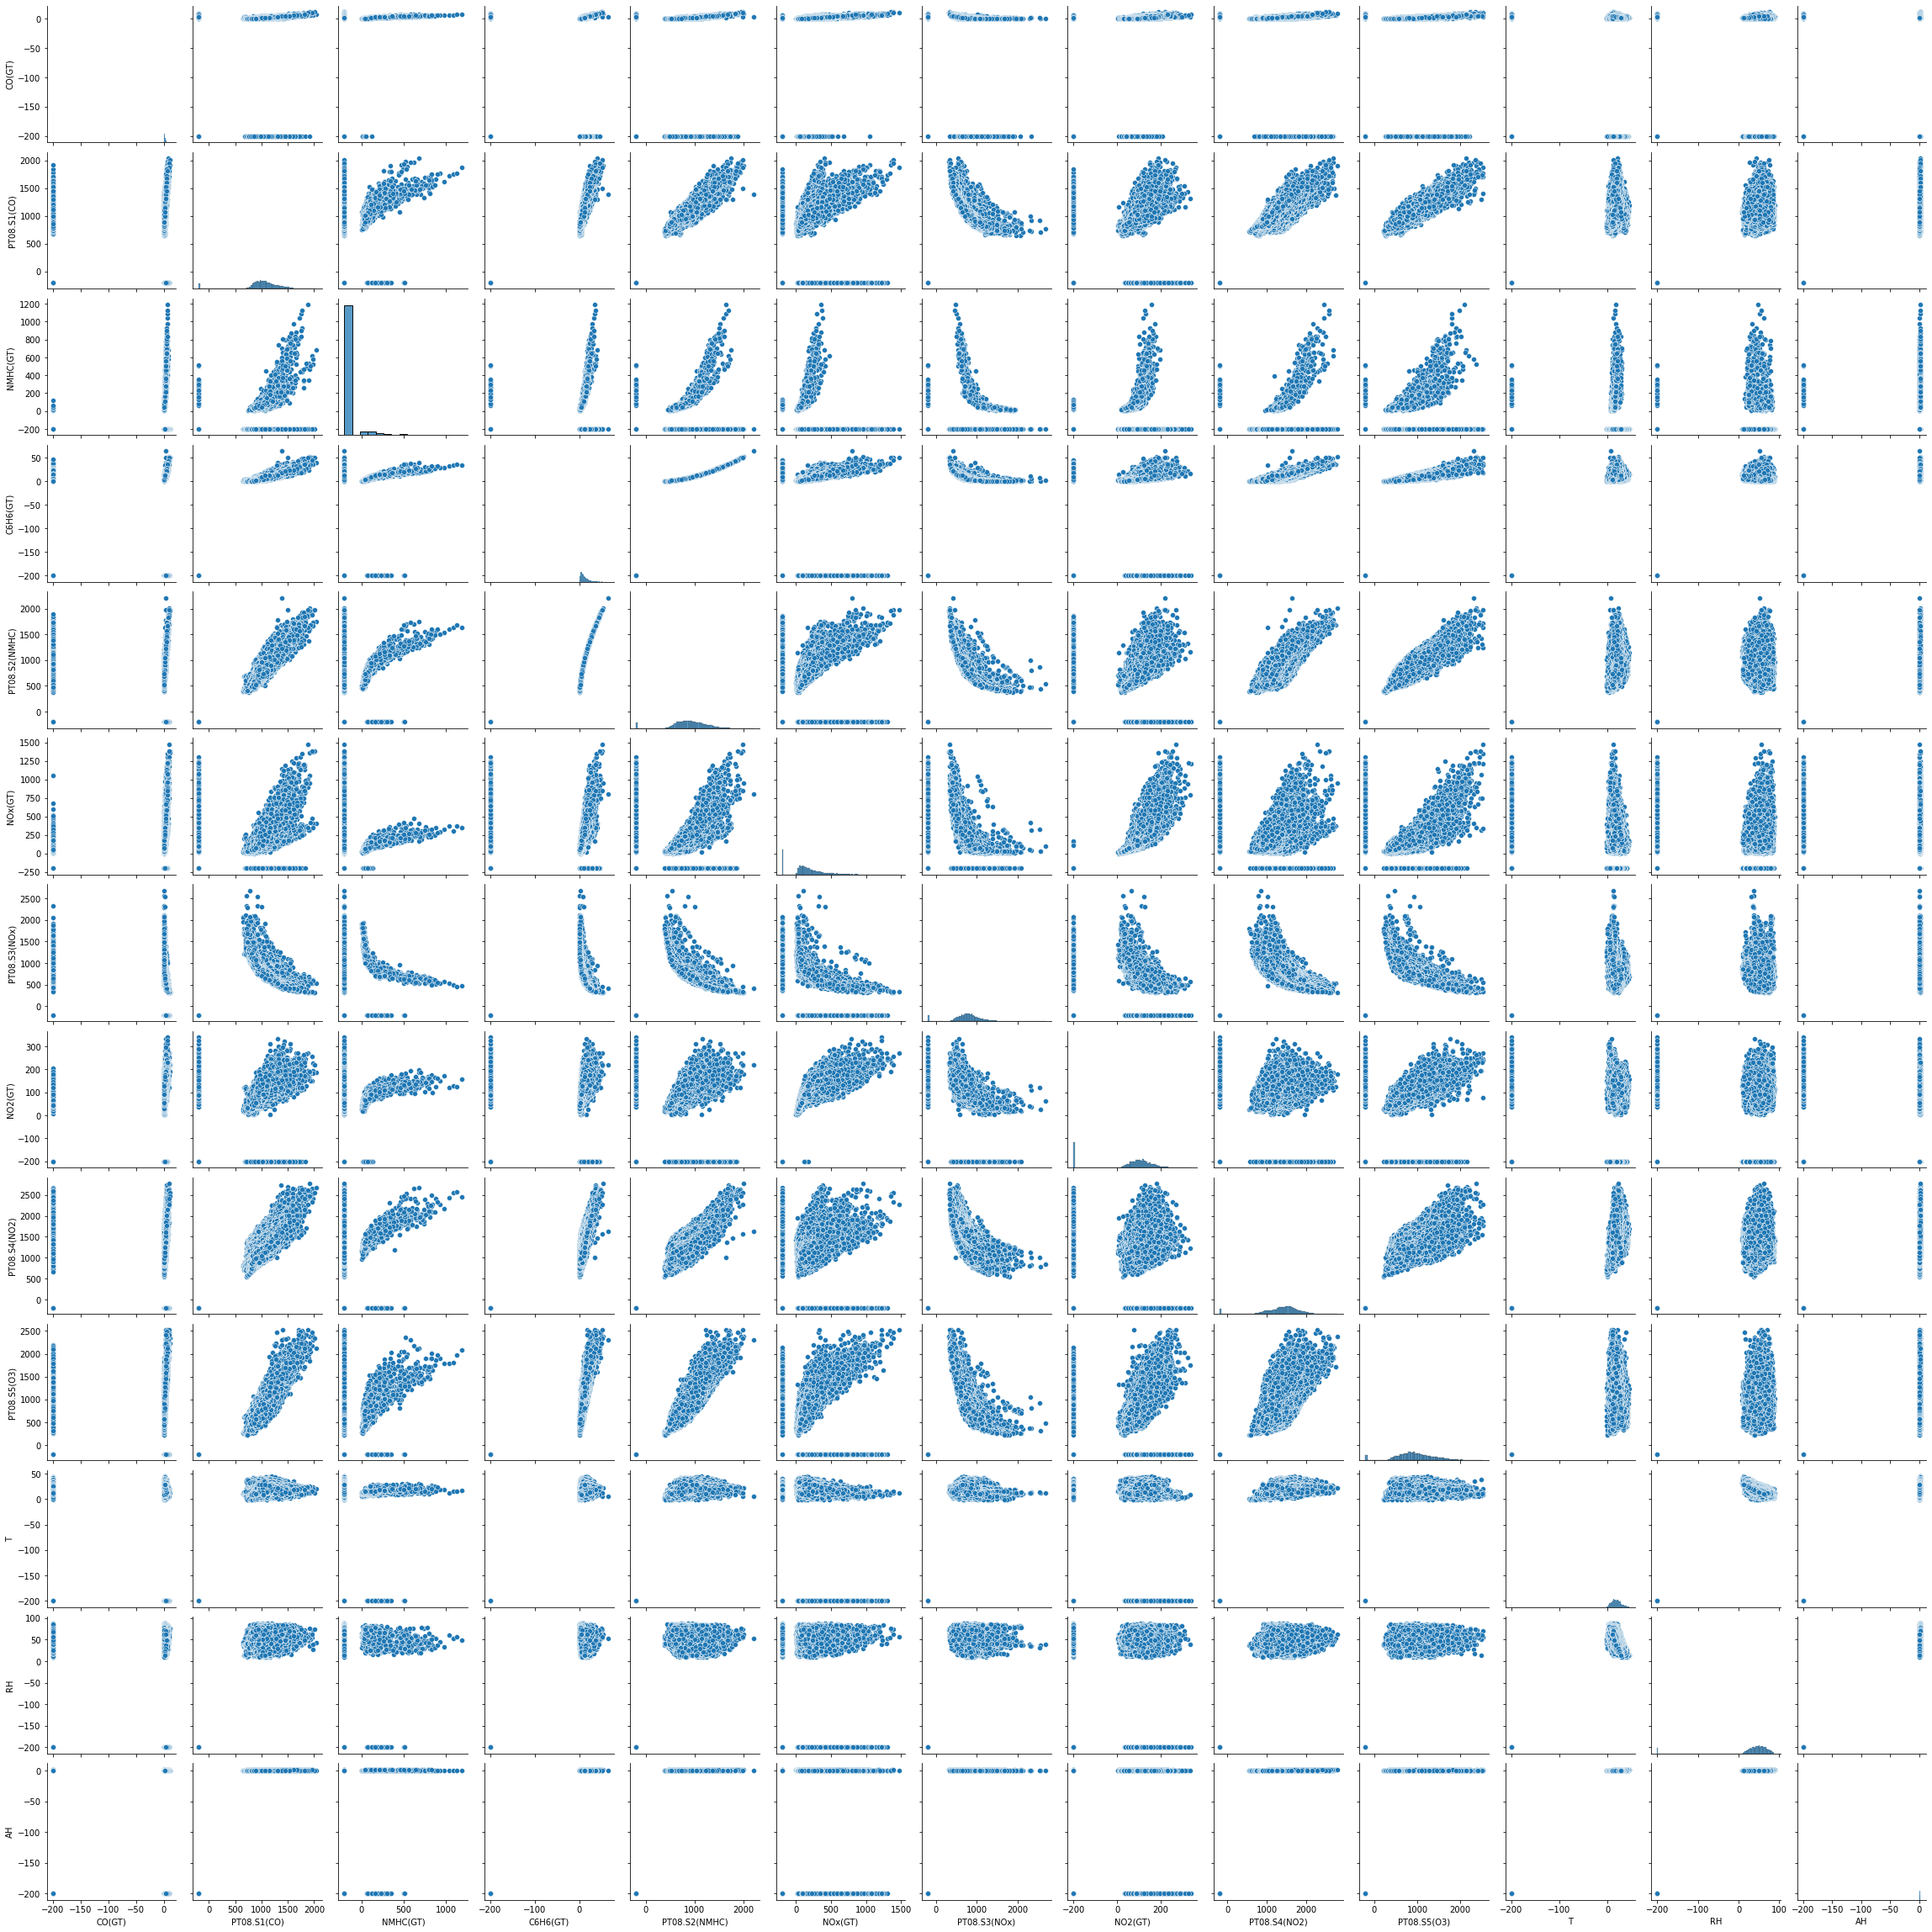

In [20]:
sns.pairplot(df)
plt.show()

## Scaling Data

In [21]:
X = df

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [23]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [24]:
cols = X.columns

In [25]:
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869


In [27]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [28]:
kmeans.cluster_centers_

array([[9.54000706e-01, 5.59920848e-01, 3.53724009e-02, 7.63114848e-01,
        4.54791181e-01, 2.56587104e-01, 3.40881061e-01, 5.51382011e-01,
        5.29083865e-01, 4.37032304e-01, 8.52026925e-01, 8.25597190e-01,
        9.51122406e-01],
       [1.63202785e-14, 5.46933357e-01, 2.46097959e-03, 7.76445893e-01,
        4.47258540e-01, 5.06466055e-02, 3.64466109e-01, 1.43696221e-01,
        5.61704240e-01, 4.06473410e-01, 8.83224045e-01, 8.47463819e-01,
        9.73554725e-01]])

In [29]:
kmeans.inertia_

2702.0395546230047

## Menentukan Jumlah Cluster Optimal dengan Elbow

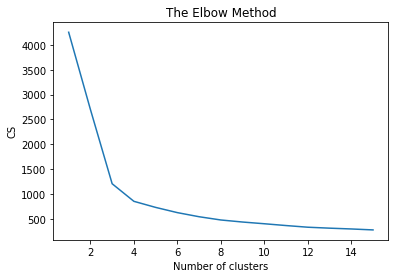

In [30]:
cs = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 16), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Klasterisasi ke 4 Klaster

In [31]:
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [32]:
kmeans.cluster_centers_

array([[ 9.49867361e-01,  5.24899342e-01,  2.43137823e-02,
         7.80415361e-01,  4.07305522e-01,  1.82857713e-01,
         4.02365475e-01,  4.87685496e-01,  5.03658307e-01,
         3.62954677e-01,  8.89812486e-01,  8.59635236e-01,
         9.93770000e-01],
       [ 1.62092562e-14,  5.58654097e-01,  2.51629930e-03,
         7.93332891e-01,  4.56786606e-01,  5.06713262e-02,
         3.72545053e-01,  1.44798839e-01,  5.73758232e-01,
         4.15095030e-01,  9.02519451e-01,  8.65979434e-01,
         9.94833163e-01],
       [ 8.62346142e-01, -2.33146835e-15,  2.25995035e-02,
        -3.33066907e-16, -9.99200722e-16,  2.90826572e-01,
        -6.66133815e-16,  5.45486744e-01,  1.33226763e-15,
         3.33066907e-16,  4.44089210e-16, -3.99680289e-15,
         1.22124533e-15],
       [ 9.59834943e-01,  6.79042590e-01,  5.37882266e-02,
         8.23943241e-01,  5.81268529e-01,  3.64512849e-01,
         2.84154378e-01,  6.45563298e-01,  6.29707610e-01,
         6.02931026e-01,  8.91102020e

In [33]:
kmeans.inertia_

854.3687954581515

In [34]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869


In [35]:
y_means = kmeans.fit_predict(X)

In [36]:
y_means

array([3, 0, 0, ..., 3, 0, 0])

In [37]:
ClusterSatu = X[y_means==0]
ClusterSatu

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869
5,0.949504,0.623661,0.171346,0.776261,0.393538,0.172126,0.533125,0.548148,0.535462,0.421961,0.863451,0.897818,0.992849
6,0.949504,0.618304,0.166307,0.772089,0.368683,0.156045,0.576483,0.512963,0.515294,0.342637,0.863859,0.889505,0.992728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,0.945729,0.485268,0.000000,0.762609,0.293289,0.156045,0.432536,0.464815,0.394622,0.275064,0.863859,0.896779,0.992869
9347,0.946201,0.485714,0.000000,0.763367,0.301574,0.164979,0.442941,0.468519,0.398992,0.285714,0.860180,0.900242,0.992701
9348,0.949033,0.549554,0.000000,0.775123,0.385253,0.227516,0.332986,0.542593,0.446723,0.405802,0.856500,0.911327,0.992692
9355,0.953752,0.537054,0.000000,0.794463,0.480944,0.259083,0.312869,0.659259,0.417143,0.356225,0.933361,0.739522,0.991509


In [38]:
ClusterDua = X[y_means==1]
ClusterDua

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
10,0.0,0.540625,0.154068,0.763367,0.301160,0.131626,0.699965,0.433333,0.469580,0.236871,0.858953,0.902321,0.992659
34,0.0,0.460268,0.151188,0.762609,0.292461,0.131626,0.725980,0.429630,0.448403,0.214469,0.842600,0.921025,0.992058
39,0.0,0.779018,0.000000,0.842245,0.643331,0.000000,0.335414,0.000000,0.758992,0.656629,0.855274,0.887426,0.992212
58,0.0,0.601339,0.184305,0.781949,0.422949,0.184038,0.462019,0.524074,0.541849,0.437752,0.846280,0.939037,0.992508
82,0.0,0.593750,0.184305,0.778157,0.403065,0.160810,0.461325,0.522222,0.555294,0.459420,0.867130,0.904399,0.993222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0.0,0.532589,0.000000,0.767160,0.333057,0.169744,0.363510,0.490741,0.457143,0.353287,0.876942,0.922757,0.994367
9130,0.0,0.590179,0.000000,0.781191,0.418807,0.226921,0.291710,0.540741,0.516303,0.485494,0.883892,0.939383,0.995403
9202,0.0,0.483482,0.000000,0.763367,0.302403,0.156641,0.415193,0.455556,0.437647,0.300037,0.873671,0.928992,0.994215
9274,0.0,0.454464,0.000000,0.761471,0.278790,0.147111,0.505376,0.446296,0.369076,0.192068,0.873671,0.861794,0.992729


In [39]:
ClusterTiga = X[y_means==2]
ClusterTiga

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,0.951864,0.0,0.303816,0.0,0.0,0.178082,0.0,0.503704,0.0,0.0,0.0,0.0,0.0
525,0.952808,0.0,0.285817,0.0,0.0,0.183443,0.0,0.520370,0.0,0.0,0.0,0.0,0.0
526,0.954696,0.0,0.373650,0.0,0.0,0.197141,0.0,0.542593,0.0,0.0,0.0,0.0,0.0
701,0.953280,0.0,0.242621,0.0,0.0,0.195950,0.0,0.566667,0.0,0.0,0.0,0.0,0.0
702,0.955168,0.0,0.280058,0.0,0.0,0.210840,0.0,0.572222,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,0.974988,0.0,0.000000,0.0,0.0,0.849911,0.0,0.974074,0.0,0.0,0.0,0.0,0.0
8112,0.974516,0.0,0.000000,0.0,0.0,0.751042,0.0,0.896296,0.0,0.0,0.0,0.0,0.0
8113,0.977348,0.0,0.000000,0.0,0.0,0.759381,0.0,0.905556,0.0,0.0,0.0,0.0,0.0
8114,0.966966,0.0,0.000000,0.0,0.0,0.500893,0.0,0.768519,0.0,0.0,0.0,0.0,0.0


In [40]:
ClusterEmpat = X[y_means==3]
ClusterEmpat

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
20,0.957527,0.701339,0.262059,0.802048,0.511185,0.242406,0.410336,0.607407,0.648739,0.454278,0.850368,0.973675,0.993288
23,0.957527,0.706696,0.251980,0.800910,0.505385,0.263848,0.419008,0.620370,0.645042,0.478884,0.857727,0.926914,0.993015
24,0.966494,0.795089,0.365011,0.837315,0.629246,0.286480,0.346514,0.650000,0.767395,0.590892,0.859771,0.915137,0.992956
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,0.967437,0.734821,0.000000,0.843383,0.647059,0.468136,0.213319,0.692593,0.664538,0.699596,0.872854,0.862141,0.992703
9351,0.962246,0.668304,0.000000,0.810011,0.539354,0.430613,0.245231,0.716667,0.529412,0.654793,0.892069,0.818497,0.992670
9352,0.958471,0.675893,0.000000,0.809632,0.538940,0.400238,0.256330,0.722222,0.529076,0.708410,0.907195,0.794250,0.992710
9353,0.955168,0.608482,0.000000,0.801669,0.508285,0.329363,0.278876,0.701852,0.492101,0.539479,0.917007,0.774853,0.992488


In [44]:
ClusterSatu.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000
mean,0.949864,0.524823,0.024336,0.780399,0.407227,0.182793,0.402450,0.487612,0.503587,0.362861,0.889799,0.859621,0.993768
std,0.002994,0.051794,0.070088,0.012261,0.063861,0.074974,0.079482,0.164434,0.093727,0.081801,0.037678,0.060910,0.002064
min,0.944313,0.378125,0.000000,0.759196,0.243165,0.000000,0.238640,0.000000,0.252437,0.154609,0.812347,0.724628,0.989881
25%,0.947617,0.487054,0.000000,0.770952,0.359983,0.153067,0.347901,0.475926,0.427227,0.301138,0.861815,0.812262,0.992152
50%,0.949504,0.523661,0.000000,0.778915,0.407208,0.182847,0.385362,0.524074,0.513613,0.368344,0.885527,0.859023,0.993664
75%,0.951864,0.560268,0.000000,0.788396,0.453604,0.225730,0.438779,0.572222,0.579832,0.421227,0.915168,0.906477,0.995111
max,0.974988,0.740179,0.468683,0.910884,0.818558,0.415724,1.000000,0.781481,0.770420,0.793243,0.993868,0.994458,0.999751


In [45]:
ClusterDua.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,1646.0,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,0.0,0.558654,0.002516,0.793333,0.456787,0.050671,0.372545,0.144799,0.573758,0.415095,0.902519,0.865979,0.994833
std,0.0,0.090172,0.020780,0.027977,0.111424,0.087255,0.088063,0.239186,0.107972,0.128460,0.033805,0.057814,0.001886
min,0.0,0.393304,0.000000,0.758817,0.241508,0.000000,0.194242,0.000000,0.292101,0.166361,0.811938,0.724628,0.990222
25%,0.0,0.491183,0.000000,0.772848,0.372929,0.000000,0.312522,0.000000,0.514958,0.329783,0.878168,0.825078,0.993596
50%,0.0,0.542411,0.000000,0.785741,0.441798,0.000000,0.363857,0.000000,0.572101,0.392582,0.902289,0.866990,0.994749
75%,0.0,0.604353,0.000000,0.804323,0.519056,0.132817,0.417274,0.429630,0.630504,0.482005,0.924366,0.908902,0.996314
max,0.0,0.910714,0.231821,0.927948,0.855841,0.525908,0.877905,0.751852,0.969412,0.882115,0.992641,0.994804,1.000000


In [46]:
ClusterTiga.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,366.000000,366.0,366.000000,366.0,366.0,366.000000,366.0,366.000000,366.0,366.0,366.0,366.0,366.0
mean,0.862346,0.0,0.022600,0.0,0.0,0.290827,0.0,0.545487,0.0,0.0,0.0,0.0,0.0
std,0.285316,0.0,0.083166,0.0,0.0,0.205079,0.0,0.226495,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.949033,0.0,0.000000,0.0,0.0,0.167957,0.0,0.509722,0.0,0.0,0.0,0.0,0.0
50%,0.953280,0.0,0.000000,0.0,0.0,0.245086,0.0,0.578704,0.0,0.0,0.0,0.0,0.0
75%,0.959415,0.0,0.000000,0.0,0.0,0.403961,0.0,0.674074,0.0,0.0,0.0,0.0,0.0
max,0.987730,0.0,0.512599,0.0,0.0,0.899345,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [47]:
ClusterEmpat.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000
mean,0.959827,0.678947,0.053713,0.823908,0.581149,0.364360,0.284187,0.645459,0.629643,0.602743,0.891121,0.867483,0.994006
std,0.018967,0.075933,0.152195,0.025591,0.078730,0.134321,0.043806,0.078934,0.110244,0.106308,0.033852,0.059409,0.001826
min,0.000000,0.505804,0.000000,0.780053,0.413007,0.000000,0.181061,0.000000,0.377143,0.378259,0.809894,0.724974,0.990068
25%,0.955639,0.621987,0.000000,0.806598,0.526926,0.256700,0.252515,0.590741,0.546218,0.520474,0.865597,0.821961,0.992710
50%,0.958943,0.668080,0.000000,0.818544,0.569594,0.337105,0.283732,0.633333,0.634286,0.584282,0.888389,0.869068,0.993811
75%,0.963190,0.726339,0.000000,0.836177,0.625932,0.439547,0.311134,0.692593,0.703866,0.665443,0.914554,0.913059,0.995275
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.555324,0.987037,1.000000,1.000000,1.000000,1.000000,0.999708


In [41]:
X = np.array(X)

<function matplotlib.pyplot.show(close=None, block=None)>

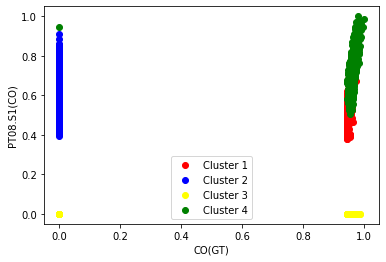

In [42]:
plt.scatter(ClusterSatu["CO(GT)"],ClusterSatu["PT08.S1(CO)"],color='red', label="Cluster 1")
plt.scatter(ClusterDua["CO(GT)"],ClusterDua["PT08.S1(CO)"],color='blue', label="Cluster 2")
plt.scatter(ClusterTiga["CO(GT)"],ClusterTiga["PT08.S1(CO)"],color='yellow', label="Cluster 3")
plt.scatter(ClusterEmpat["CO(GT)"],ClusterEmpat["PT08.S1(CO)"],color='green', label="Cluster 4")
plt.xlabel('CO(GT)')
plt.ylabel('PT08.S1(CO)')

plt.legend(),
plt.show

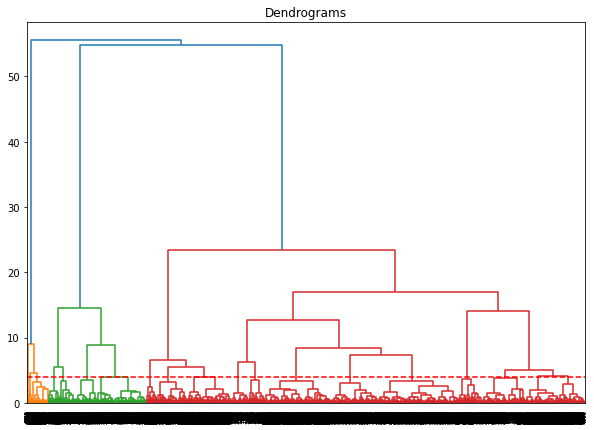

In [43]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')